In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import sys
sys.path.append('../')

In [2]:
from propagator.constants import  *

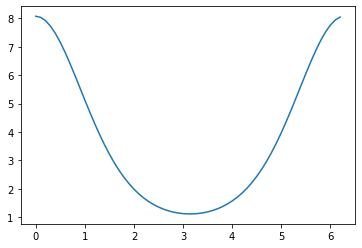

In [3]:
w_speed = 20 #in m/s
angle_to = 0
dh = 0
cellsize= 20
dist = 1
v = 3 # in m/min

W_DIR = np.arange(0, np.pi*2, 0.1)
V_WH = []
for w_dir in W_DIR:
    w_proj = np.cos(w_dir - angle_to) #wind component in propagation direction

    teta_s_rad = np.arctan(dh / cellsize * dist) #slope angle [rad]
    teta_s_pos = np.absolute(teta_s_rad) #absolute values of slope angle
    p_reverse = np.sign(dh) # +1 if fire spreads upslope, -1 if fire spreads downslope
    v_wh_pre = v * np.exp(beta1 * w_speed * w_proj / 3.6) * np.exp(p_reverse * beta2 * np.tan(teta_s_pos)**beta3) #Rate of Spread evaluate with Wang Zhengfei's model
    v_wh = np.clip(v_wh_pre, 0.01, 100) #adoptable RoS
    
    V_WH.append(v_wh)
    
plt.plot(W_DIR, V_WH)        

Contributo del vento
---------------------

C:\Users\utente\Miniconda3\envs\propagator_venv\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


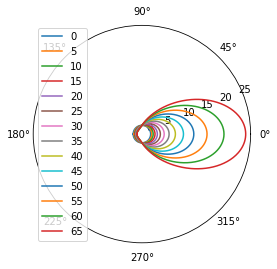

In [6]:
b = np.arange(-pi, pi, 0.01)
W_SPEED = np.arange(0, 70, 5)

W_EFFECT = []
for w_speed in W_SPEED:
    w_proj = np.cos(b - angle_to) #wind component in propagation direction

    w_effect = np.exp(beta1 * w_speed * w_proj / 3.6) #wind effect evaluate with Wang Zhengfei's model
    
    W_EFFECT.append(w_effect)
    ax = plt.subplot(111, projection='polar')
    ax.plot(b, w_effect) 
    
    

#plt.xlabel('angle')
#plt.ylabel('w-effect')
plt.grid()
plt.legend(W_SPEED, loc='center left')

Text(0, 0.5, 'Wind Factor [-]')

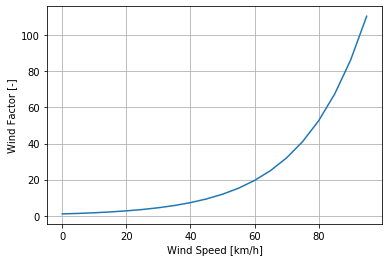

In [5]:
b=0
W_SPEED = np.arange(0, 100, 5)

W_EFFECT = []
for w_speed in W_SPEED:
    w_proj = np.cos(b - angle_to) #wind component in propagation direction

    w_effect = np.exp(beta1 * w_speed * w_proj / 3.6) #wind effect evaluate with Wang Zhengfei's model

    W_EFFECT.append(w_effect)
W_Speed = W_SPEED.transpose()
plt.plot(W_Speed, W_EFFECT) 
   
plt.grid()
plt.xlabel('Wind Speed [km/h]')
plt.ylabel('Wind Factor [-]')

Contributo dello slope
------------------

Text(0, 0.5, 'slope-effect')

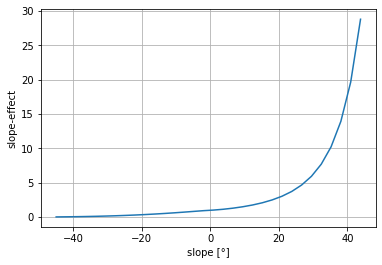

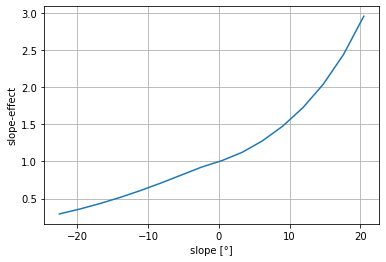

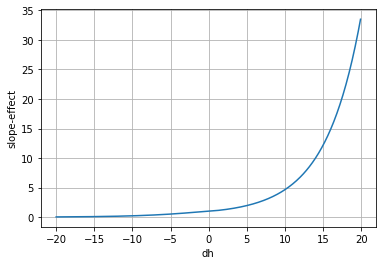

In [8]:
teta_s_rad = np.arange(-pi/4,pi/4,0.05)
teta_s_deg = np.degrees(teta_s_rad)
teta_s_pos = np.absolute(teta_s_rad) #absolute values of slope angle
p_reverse = np.sign(teta_s_rad) # +1 if fire spreads upslope, -1 if fire spreads downslope
s_effect = np.exp(p_reverse * beta2 * np.tan(teta_s_pos)**beta3) #slope effect evaluate with Wang Zhengfei's model

plt.plot(teta_s_deg, s_effect)
plt.grid()
plt.xlabel('slope [°]')
plt.ylabel('slope-effect')


#più nel dettaglio....
teta_s_rad2 = np.arange(-pi/8,pi/8,0.05) #slope angle [rad]
teta_s_deg2 = np.degrees(teta_s_rad2)
teta_s_pos2 = np.absolute(teta_s_rad2) #absolute values of slope angle
p_reverse2 = np.sign(teta_s_rad2) # +1 if fire spreads upslope, -1 if fire spreads downslope
s_effect2 = np.exp(p_reverse2 * beta2 * np.tan(teta_s_pos2)**beta3) #slope effect evaluate with Wang Zhengfei's model

plt.figure()
plt.plot(teta_s_deg2, s_effect2)
plt.grid()
plt.xlabel('slope [°]')
plt.ylabel('slope-effect')

#se guardo come varia in funzione di dh

dh = np.arange(-20,20,0.1) #dh
teta_s_rad3 = np.arctan(dh / cellsize * dist) #slope angle [rad]
teta_s_pos3 = np.absolute(teta_s_rad3) #absolute values of slope angle
p_reverse3 = np.sign(dh) # +1 if fire spreads upslope, -1 if fire spreads downslope
s_effect3 = np.exp(p_reverse3 * beta2 * np.tan(teta_s_pos3)**beta3) #slope effect evaluate with Wang Zhengfei's model

plt.figure()
plt.plot(dh, s_effect3)
plt.grid()
plt.xlabel('dh')
plt.ylabel('slope-effect')

Contributo del vento limitato
---------------------

Text(0, 0.5, 'Wind Factor [-]')

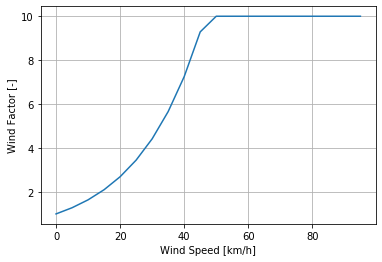

In [10]:
b=0
W_SPEED = np.arange(0, 100, 5)

W_EFFECT = []
for w_speed in W_SPEED:
    w_proj = np.cos(b - angle_to) #wind component in propagation direction

    w_effect = np.exp(beta1 * w_speed * w_proj / 3.6) #wind effect evaluate with Wang Zhengfei's model
    w_effect_c = np.clip(w_effect , 0.01 , 10)
    
    W_EFFECT.append(w_effect_c)
W_Speed = W_SPEED.transpose()
plt.plot(W_Speed, W_EFFECT) 
   
plt.grid()
plt.xlabel('Wind Speed [km/h]')
plt.ylabel('Wind Factor [-]')

Contributo dello slope limitato
------------------

Text(0, 0.5, 'slope-effect')

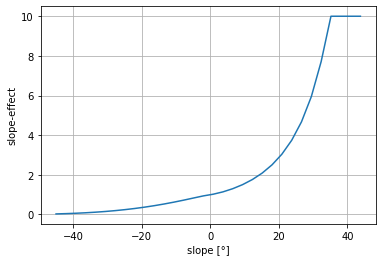

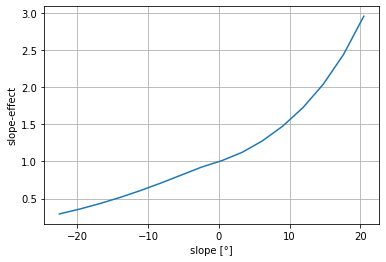

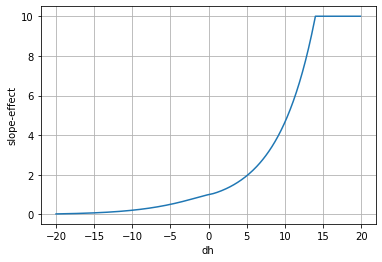

In [11]:
teta_s_rad = np.arange(-pi/4,pi/4,0.05)
teta_s_deg = np.degrees(teta_s_rad)
teta_s_pos = np.absolute(teta_s_rad) #absolute values of slope angle
p_reverse = np.sign(teta_s_rad) # +1 if fire spreads upslope, -1 if fire spreads downslope
s_effect = np.exp(p_reverse * beta2 * np.tan(teta_s_pos)**beta3) #slope effect evaluate with Wang Zhengfei's model
s_effect_c = np.clip(s_effect , 0.01 , 10)

plt.plot(teta_s_deg, s_effect_c)
plt.grid()
plt.xlabel('slope [°]')
plt.ylabel('slope-effect')


#più nel dettaglio....
teta_s_rad2 = np.arange(-pi/8,pi/8,0.05) #slope angle [rad]
teta_s_deg2 = np.degrees(teta_s_rad2)
teta_s_pos2 = np.absolute(teta_s_rad2) #absolute values of slope angle
p_reverse2 = np.sign(teta_s_rad2) # +1 if fire spreads upslope, -1 if fire spreads downslope
s_effect2 = np.exp(p_reverse2 * beta2 * np.tan(teta_s_pos2)**beta3) #slope effect evaluate with Wang Zhengfei's model
s_effect2_c = np.clip(s_effect2 , 0.01 , 10)

plt.figure()
plt.plot(teta_s_deg2, s_effect2_c)
plt.grid()
plt.xlabel('slope [°]')
plt.ylabel('slope-effect')

#se guardo come varia in funzione di dh

dh = np.arange(-20,20,0.1) #dh
teta_s_rad3 = np.arctan(dh / cellsize * dist) #slope angle [rad]
teta_s_pos3 = np.absolute(teta_s_rad3) #absolute values of slope angle
p_reverse3 = np.sign(dh) # +1 if fire spreads upslope, -1 if fire spreads downslope
s_effect3 = np.exp(p_reverse3 * beta2 * np.tan(teta_s_pos3)**beta3) #slope effect evaluate with Wang Zhengfei's model
s_effect3_c = np.clip(s_effect3 , 0.01 , 10)

plt.figure()
plt.plot(dh, s_effect3_c)
plt.grid()
plt.xlabel('dh')
plt.ylabel('slope-effect')